<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook contains an excerpt from the [Python Programming and Numerical Methods - A Guide for Engineers and Scientists](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9), the content is also available at [Berkeley Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html).*

*The copyright of the book belongs to Elsevier. We also have this interactive book online for a better learning experience. The code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work on [Elsevier](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9) or [Amazon](https://www.amazon.com/Python-Programming-Numerical-Methods-Scientists/dp/0128195495/ref=sr_1_1?dchild=1&keywords=Python+Programming+and+Numerical+Methods+-+A+Guide+for+Engineers+and+Scientists&qid=1604761352&sr=8-1)!*

<!--NAVIGATION-->
< [17.4 Lagrange Polynomial Interpolation](chapter17.04-Lagrange-Polynomial-Interpolation.ipynb)  | [Contents](Index.ipynb) | [17.6 Summary and Problems](chapter17.06-Summary-and-Problems.ipynb) >

# Newton's Polynomial Interpolation

Newton's polynomial interpolation is another popular way to fit exactly for a set of data points. The general form of the an $n-1$ order Newton's polynomial that goes through $n$ points is:

$$ f(x) = a_0 + a_1(x-x_0) + a_2(x-x_0)(x-x_1) + \dots + a_n(x-x_0)(x-x_1)\dots(x-x_n)$$

which can be re-written as:

$$ f(x) = \sum_{i=0}^{n}{a_in_i(x)}$$ 

where $$ n_i(x) = \prod_{j=0}^{i-1}(x-x_j)$$

The special feature of the Newton's polynomial is that the coefficients $a_i$ can be determined using a very simple mathematical procedure. For example, since the polynomial goes through each data points, therefore, for a data points $(x_i, y_i)$, we will have $f(x_i) = y_i$, thus we have 

$$f(x_0) = a_0 = y_0$$

And $f(x_1) = a_0 + a_1(x_1-x_0) = y_1$, by rearranging it to get $a_1$, we will have:

$$a_1 = \frac{y_1 - y_0}{x_1 - x_0}$$

Now, insert data points $(x_2, y_2)$, we can calculate $a_2$, and it is in the form:

$$a_2 = \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0}$$

Let's do one more data points $(x_3, y_3)$ to calculate $a_3$, after insert the data point into the equation, we get:

$$a_3 = \frac{\frac{\frac{y_3-y_2}{x_3-x_2} - \frac{y_2 - y_1}{x_2-x_1}}{x_3 - x_1} - \frac{\frac{y_2-y_1}{x_2-x_1}-\frac{y_1 - y_0}{x_1 - x_0}}{x_2-x_0}}{x_3 - x_0}$$

Now, see the patterns? These are called **divided differences**, if we define:

$$ f[x_1, x_0] = \frac{y_1 - y_0}{x_1 - x_0}$$

$$ f[x_2, x_1, x_0] = \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0} = \frac{f[x_2,x_1] - f[x_1,x_0]}{x_2-x_1}$$

We continue write this out, we will have the following iteration equation:

$$ f[x_k, x_{k-1}, \dots, x_{1}, x_0] = \frac{f[x_k, x_{k-1}, \dots, x_{2}, x_2] - f[x_{k-1}, x_{k-2}, \dots, x_{1}, x_0]}{x_k-x_0}$$

We can see one beauty of the method is that, once the coefficients are determined, adding new data points won't change the calculated ones, we only need to calculate higher differences continues in the same manner. The whole procedure for finding these coefficients can be summarized into a divided differences table. Let's see an example using 5 data points:

$$
\begin{array}{cccccc}
x_0 & y_0 \\
    &     & f[x_1,x_0] \\
x_1 & y_1 &             & f[x_2, x_1,x_0]\\
    &     & f[x_2,x_1]  &              & f[x_3, x_2, x_1,x_0]\\
x_2 & y_2 &             & f[x_3, x_2,x_1] &             & f[x_4, x_3, x_2, x_1,x_0]\\
    &     & f[x_3,x_2]  &              & f[x_4, x_3, x_2, x_1]\\
x_3 & y_3 &             & f[x_4, x_3,x_2]\\
    &     & f[x_4,x_3] \\
x_4 & y_4
\end{array}
$$

Each element in the table can be calculated using the two previous elements (to the left). In reality, we can calculate each element and store them into a diagonal matrix, that is the coefficients matrix can be write as:

$$
\begin{array}{cccccc}
y_0 & f[x_1,x_0] & f[x_2, x_1,x_0] & f[x_3, x_2, x_1,x_0] & f[x_4, x_3, x_2, x_1,x_0]\\
y_1 & f[x_2,x_1] & f[x_3, x_2,x_1] & f[x_4, x_3, x_2, x_1] & 0\\
y_2 & f[x_3,x_2] & f[x_4, x_3,x_2] & 0          & 0 \\
y_3 & f[x_4,x_3] & 0 & 0 & 0            \\
y_4 & 0 & 0 & 0  & 0  
\end{array}
$$

Note that, the first row in the matrix is actually all the coefficients that we need, i.e. $a_0, a_1, a_2, a_3, a_4$. Let's see an example how we can do it. 

**TRY IT!** Calculate the divided differences table for x = [-5, -1, 0, 2], y = [-2, 6, 1, 3]. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

In [2]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

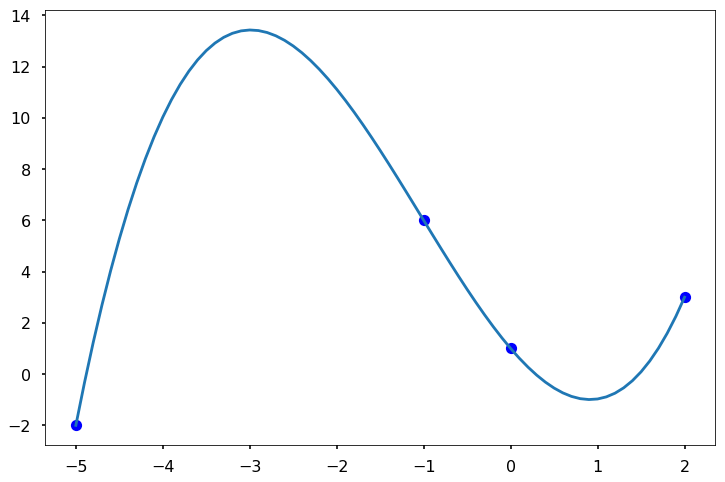

In [3]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)

We can see that the Newton's polynomial goes through all the data points and fit the data.

<!--NAVIGATION-->
< [17.4 Lagrange Polynomial Interpolation](chapter17.04-Lagrange-Polynomial-Interpolation.ipynb)  | [Contents](Index.ipynb) | [17.6 Summary and Problems](chapter17.06-Summary-and-Problems.ipynb) >